In [1]:
import torch
from torchvision import models

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

# Modify the final layer for 7 classes
num_classes = 7
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Switch to training mode
model.train()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 78.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final layer
for param in model.fc.parameters():
    param.requires_grad = True


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Path to the uploaded zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the extracted files
os.listdir('/content/dataset')

['train', 'test']

In [5]:
num_classes = 7
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

In [6]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define transforms for train and test sets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder('/content/dataset/train', transform=train_transforms)
test_dataset = ImageFolder('/content/dataset/test', transform=test_transforms)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1, Loss: 1.5986, Train Accuracy: 37.43%, Test Accuracy: 42.09%
Epoch 2, Loss: 1.5064, Train Accuracy: 41.97%, Test Accuracy: 38.48%
Epoch 3, Loss: 1.4843, Train Accuracy: 43.01%, Test Accuracy: 44.18%
Epoch 4, Loss: 1.4714, Train Accuracy: 43.34%, Test Accuracy: 42.89%
Epoch 5, Loss: 1.4638, Train Accuracy: 43.80%, Test Accuracy: 42.84%
Epoch 6, Loss: 1.4516, Train Accuracy: 44.48%, Test Accuracy: 42.62%
Epoch 7, Loss: 1.4479, Train Accuracy: 44.53%, Test Accuracy: 41.38%
Epoch 8, Loss: 1.4437, Train Accuracy: 44.84%, Test Accuracy: 42.27%
Epoch 9, Loss: 1.4434, Train Accuracy: 44.64%, Test Accuracy: 43.19%
Epoch 10, Loss: 1.4440, Train Accuracy: 44.68%, Test Accuracy: 40.99%
Epoch 11, Loss: 1.4413, Train Accuracy: 44.63%, Test Accuracy: 42.87%
Epoch 12, Loss: 1.4400, Train Accuracy: 44.72%, Test Accuracy: 44.12%
Epoch 13, Loss: 1.4401, Train Accuracy: 45.21%, Test Accuracy: 42.99%
Epoch 14, Loss: 1.4360, Train Accuracy: 45.33%, Test Accuracy: 42.32%
Epoch 15, Loss: 1.4385, Train

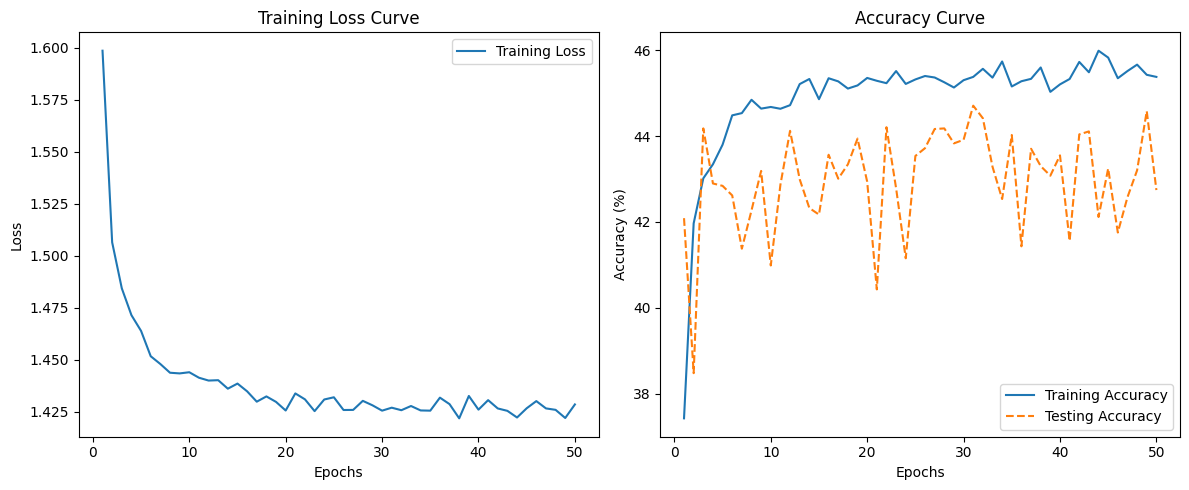

In [8]:
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []
test_accuracies = []

# Training and testing loops
for epoch in range(50):  # Number of epochs
    # Training phase
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Testing phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    # Print epoch metrics
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(range(1, 51), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, 51), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 51), test_accuracies, label='Testing Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()
